## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Credit Arigole

* Societe Generale

* Deutsche Bank 

* HSBC Bank

* Credit Suisse Bank

* ING Bank 


** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use Yahoo finance as a source, for example:**
    
    # Bank of BNP Paris bas
    BNP = data.DataReader("BNP.PA", 'yahoo', start, end)

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [35]:
url = 'https://en.wikipedia.org/wiki/CAC_40'

In [40]:
df = pd.read_html(url)

In [49]:
cac40 = df[3]

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table # EDIT: see deprecation warnings below

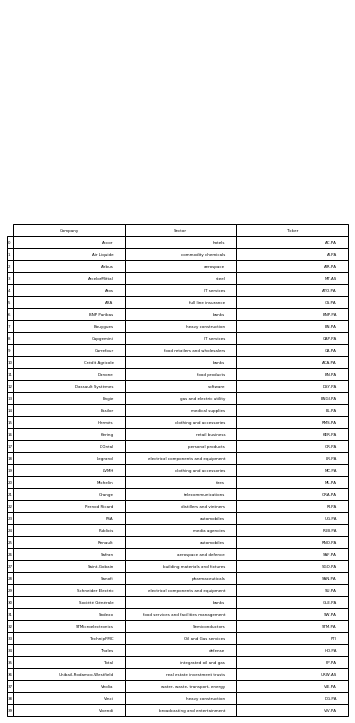

In [53]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, cac40)  # where df is your data frame

plt.savefig('mytable.png')

In [61]:
cac40[cac40['Sector'] == 'banks']

,Company,Sector,Ticker
6,BNP Paribas,banks,BNP.PA
10,Crédit Agricole,banks,ACA.PA
30,Société Générale,banks,GLE.PA


In [60]:
cac40['Sector'].describe()

count        40
unique       33
top       banks
freq          3
Name: Sector, dtype: object

In [3]:
start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2020, 4, 7)

In [6]:
# Bank of BNP Paris bas
BNP = data.DataReader("BNP.PA", 'yahoo', start, end)

#Credit arigole
CA = SG = data.DataReader("ACA.PA", 'yahoo', start, end)

#societe generale
SG = data.DataReader("GLE.PA", 'yahoo', start, end)

# Deutsche Bank 
DB = data.DataReader("DB", 'yahoo', start, end)

# HSBC Bank
HSBC = data.DataReader("HSBC", 'yahoo', start, end)

# Credit Suisse Bank
CS = data.DataReader("CS", 'yahoo', start, end)

# ING Bank 
ING = data.DataReader("ING", 'yahoo', start, end)

In [8]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [7]:
tickers = ['BNP', 'CA', 'SG', 'DB', 'HSBC', 'CS', 'ING']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [8]:
bank_stocks = pd.concat([BNP, CA, SG, DB, HSBC, CS,ING],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [9]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [10]:
bank_stocks.head()

Bank Ticker        BNP                                                         \
Stock Info        High        Low       Open      Close     Volume  Adj Close   
Date                                                                            
2007-01-02   85.099998  83.400002  83.500000  84.699997  3842680.0  49.528717   
2007-01-03   85.800003  84.500000  85.099998  85.500000  3805373.0  49.996510   
2007-01-04   85.599998  84.400002  85.000000  85.300003  3068882.0  49.879574   
2007-01-05   85.099998  84.099998  84.900002  84.099998  2883702.0  49.177856   
2007-01-08   85.000000  83.599998  84.300003  84.099998  3271418.0  49.177856   

Bank Ticker       CA                                   ...         CS  \
Stock Info      High        Low       Open      Close  ...       Open   
Date                                                   ...              
2007-01-02   28.5879  27.983900  28.054001  28.587900  ...        NaN   
2007-01-03   28.7892  28.369101  28.517900  28.010201  ...  68.945312   
2007-01-04   28.6742  28.283199  28.292101  28.461000  ...  68.076172   
2007-01-05   28.4165  28.096600  28.389900  28.158800  ...  67.324219   
2007-01-08   28.2477  27.963400  28.123301  28.070000  ...  66.865234   

Bank Ticker                                        ING                        \
Stock Info       Close    Volume  Adj Close       High        Low       Open   
Date                                                                           
2007-01-02         NaN       NaN        NaN        NaN        NaN        NaN   
2007-01-03   68.466797  556800.0  44.503193  45.169998  44.500000  45.020000   
2007-01-04   68.398438  417700.0  44.458759  44.799999  44.419998  44.680000   
2007-01-05   67.158203  420900.0  43.652611  44.080002  43.610001  44.040001   
2007-01-08   66.699219  588600.0  43.354271  43.810001  43.340000  43.520000   

Bank Ticker                                  
Stock Info       Close    Volume  Adj Close  
Date                                         
2007-01-02         NaN       NaN        NaN  
2007-01-03   44.650002  565100.0  31.685804  
2007-01-04   44.590000  697800.0  31.643221  
2007-01-05   43.840000  606900.0  31.110983  
2007-01-08   43.779999  499100.0  31.068405  

[5 rows x 42 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [11]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BNP      94.300003
CA       29.882700
SG      141.537994
DB      152.280533
HSBC     99.519997
CS       77.177734
ING      47.180000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [12]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [13]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BNP Return,CA Return,SG Return,DB Return,HSBC Return,CS Return,ING Return
Date,,,,,,,
2007-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,0.009445,-0.020208,0.000758,NaN,NaN,NaN,NaN
2007-01-04,-0.002339,0.016094,0.000000,0.000443,-0.007529,-0.000998,-0.001344
2007-01-05,-0.014068,-0.010618,-0.006843,-0.017504,-0.008887,-0.018132,-0.016820
2007-01-08,0.000000,-0.003154,-0.004594,-0.002481,-0.005249,-0.006834,-0.001369


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

D:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


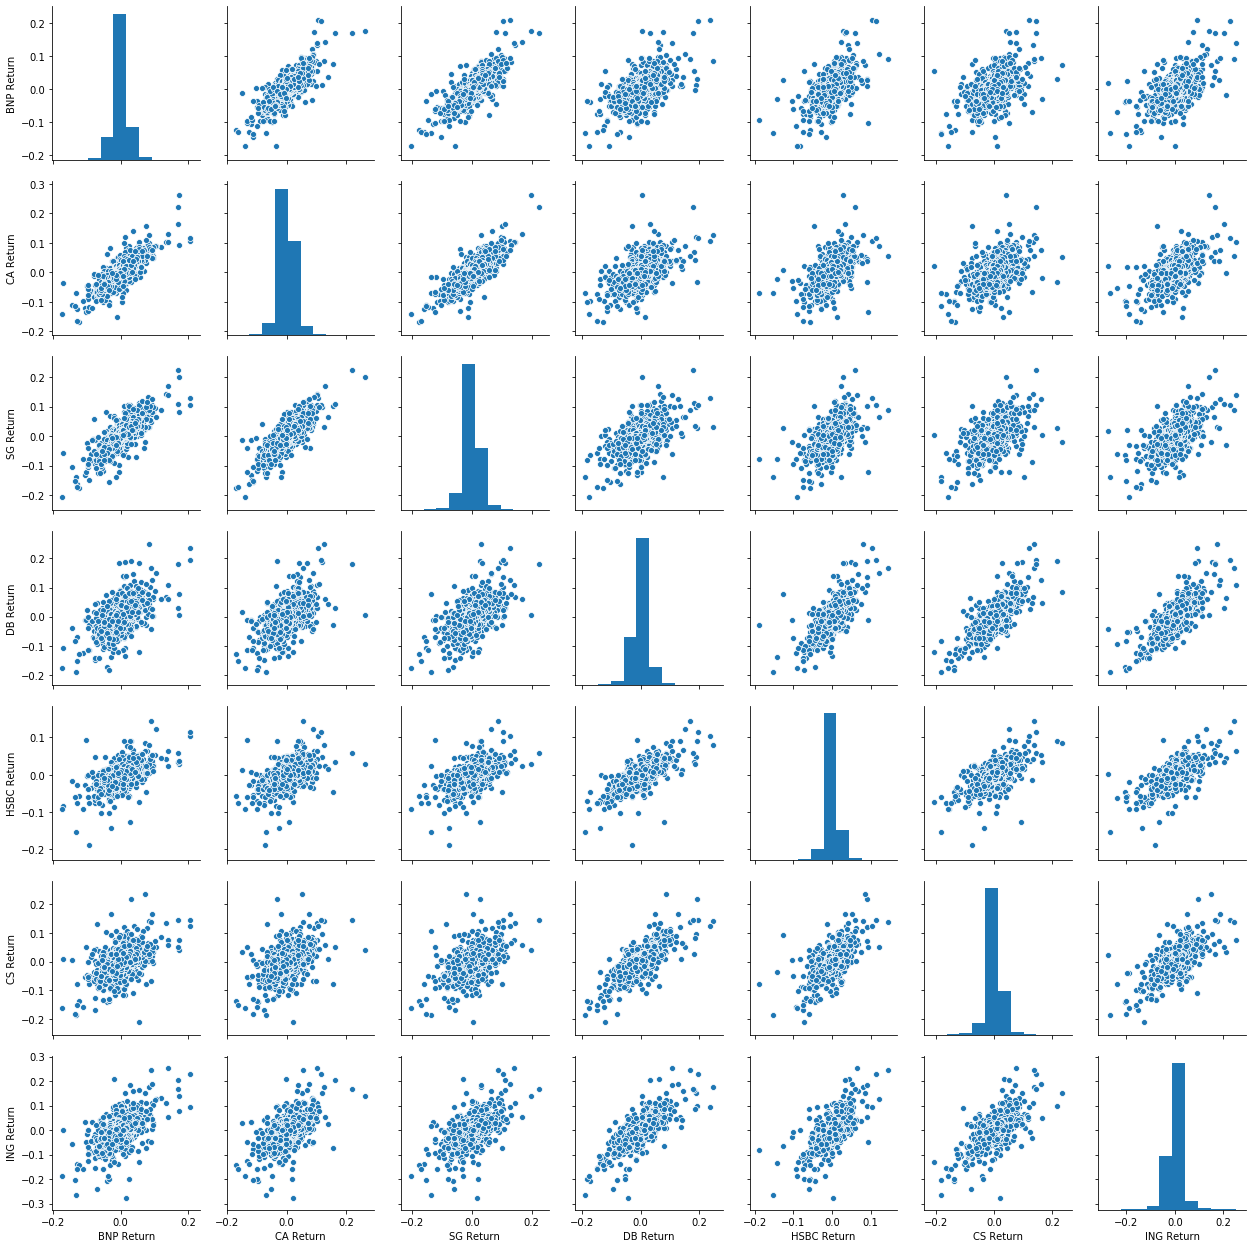

In [14]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

You'll also see the enormous crash in value if you take a look a the stock price plot (which we do later in the visualizations.)

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [15]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BNP Return    2016-06-24
CA Return     2020-03-09
SG Return     2016-06-24
DB Return     2009-01-20
HSBC Return   2009-03-02
CS Return     2008-10-09
ING Return    2008-10-17
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [16]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BNP Return    2009-01-28
CA Return     2008-09-19
SG Return     2011-10-27
DB Return     2008-11-24
HSBC Return   2009-03-23
CS Return     2008-10-13
ING Return    2010-05-10
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [17]:
returns.std() # ING Bank riskiest

BNP Return     0.025434
CA Return      0.027467
SG Return      0.028694
DB Return      0.030067
HSBC Return    0.017746
CS Return      0.027037
ING Return     0.032584
dtype: float64

In [27]:
returns.ix['2010-01-01':'2010-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BNP Return     0.024480
CA Return      0.026787
SG Return      0.028499
DB Return      0.025996
HSBC Return    0.015763
CS Return      0.023214
ING Return     0.034771
dtype: float64

In [49]:
stdyear = pd.DataFrame()

In [46]:
keyyear = ['2007', '2008', '2009', '2010', '2011', '2012', '2013','2014','2015','2016','2017','2018','2019']

In [29]:
Y07 = returns.ix['2007-01-01':'2007-12-31'].std()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [31]:
Y08 = returns.ix['2008-01-01':'2008-12-31'].std()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [32]:
Y09 = returns.ix['2009-01-01':'2009-12-31'].std()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [33]:
Y10 = returns.ix['2010-01-01':'2010-12-31'].std()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [34]:
Y11 = returns.ix['2011-01-01':'2011-12-31'].std()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [35]:
Y12 = returns.ix['2012-01-01':'2012-12-31'].std()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [36]:
Y13 = returns.ix['2013-01-01':'2013-12-31'].std()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [37]:
Y14 = returns.ix['2014-01-01':'2014-12-31'].std()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [38]:
Y15 = returns.ix['2015-01-01':'2015-12-31'].std()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [39]:
Y16 = returns.ix['2016-01-01':'2016-12-31'].std()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [40]:
Y17 = returns.ix['2017-01-01':'2017-12-31'].std()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [41]:
Y18 = returns.ix['2018-01-01':'2018-12-31'].std()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [42]:
Y19 = returns.ix['2019-01-01':'2019-12-31'].std()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [99]:
Y20 = returns.ix['2020-01-01':'2020-04-07'].std()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



In [100]:
Y20

BNP Return     0.041088
CA Return      0.043567
SG Return      0.054334
DB Return      0.048152
HSBC Return    0.027719
CS Return      0.051575
ING Return     0.052651
dtype: float64

In [50]:
stdyear = pd.concat([Y07, Y08, Y09, Y10, Y11, Y12,Y13, Y14, Y15, Y16, Y17, Y18, Y19],axis=1,keys=keyyear)

In [112]:
stdyear0820 = pd.concat([Y08,Y20],axis=1,keys=[2008,'4/12 of 2020'])

In [113]:
stdyear0820

,2008,4/12 of 2020
BNP Return,0.038618,0.041088
CA Return,0.047974,0.043567
SG Return,0.044996,0.054334
DB Return,0.049150,0.048152
HSBC Return,0.028228,0.027719
CS Return,0.051270,0.051575
ING Return,0.054768,0.052651


Text(0, 0.5, 'Standard deviation')

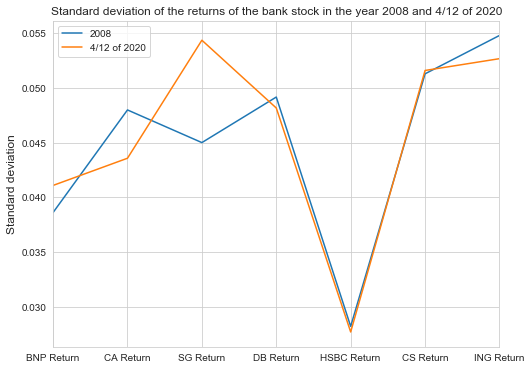

In [114]:
stdyear0820.plot(figsize = (8,6))
plt.title('Standard deviation of the returns of the bank stock in the year 2008 and 4/12 of 2020', size = 12)
plt.ylabel('Standard deviation', size = 12)

In [55]:
stdyear

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
BNP Return,0.016444,0.038618,0.039715,0.024480,0.038544,0.026437,0.017302,0.014948,0.017737,0.024002,0.013804,0.011917,0.015625
CA Return,0.015660,0.047974,0.036107,0.026787,0.038431,0.032344,0.020473,0.018347,0.019849,0.024980,0.014549,0.012579,0.015832
SG Return,0.018019,0.044996,0.036809,0.028499,0.042645,0.032678,0.021841,0.018037,0.018866,0.028636,0.015895,0.011953,0.018540
DB Return,0.016847,0.049150,0.050202,0.025996,0.037376,0.027110,0.017135,0.015244,0.019823,0.032534,0.019551,0.021755,0.022791
HSBC Return,0.011932,0.028228,0.035417,0.015763,0.019806,0.013332,0.011003,0.009351,0.013071,0.016378,0.009137,0.011603,0.009609
CS Return,0.016225,0.051270,0.043531,0.023214,0.031045,0.023627,0.016283,0.012689,0.017727,0.027770,0.014689,0.015123,0.013637
ING Return,0.015101,0.054768,0.063434,0.034771,0.043060,0.028405,0.020292,0.017035,0.017786,0.023911,0.012257,0.015408,0.015649


In [56]:
print(stdyear.columns)

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'],
      dtype='object')


In [57]:
years = list(map(str, range(2007, 2020)))
years

['2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [58]:
BNPreturn = stdyear.loc['BNP Return', years] # passing in years 1980 - 2013 to exclude the 'total' column
BNPreturn.head()

2007    0.016444
2008    0.038618
2009    0.039715
2010    0.024480
2011    0.038544
Name: BNP Return, dtype: float64

In [59]:
BNPreturn

2007    0.016444
2008    0.038618
2009    0.039715
2010    0.024480
2011    0.038544
2012    0.026437
2013    0.017302
2014    0.014948
2015    0.017737
2016    0.024002
2017    0.013804
2018    0.011917
2019    0.015625
Name: BNP Return, dtype: float64

In [63]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [69]:
Returns = stdyear.loc[['BNP Return','CA Return','SG Return','DB Return','HSBC Return','CS Return','ING Return'], years]

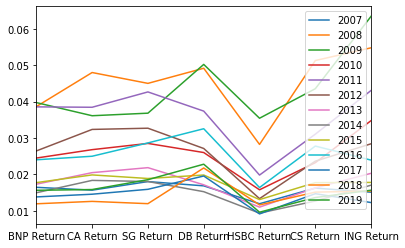

In [73]:
Returns.plot(kind = 'line')

In [74]:
stdyeartranpose = stdyear.transpose()
stdyeartranpose

,BNP Return,CA Return,SG Return,DB Return,HSBC Return,CS Return,ING Return
2007,0.016444,0.015660,0.018019,0.016847,0.011932,0.016225,0.015101
2008,0.038618,0.047974,0.044996,0.049150,0.028228,0.051270,0.054768
2009,0.039715,0.036107,0.036809,0.050202,0.035417,0.043531,0.063434
2010,0.024480,0.026787,0.028499,0.025996,0.015763,0.023214,0.034771
2011,0.038544,0.038431,0.042645,0.037376,0.019806,0.031045,0.043060
2012,0.026437,0.032344,0.032678,0.027110,0.013332,0.023627,0.028405
2013,0.017302,0.020473,0.021841,0.017135,0.011003,0.016283,0.020292
2014,0.014948,0.018347,0.018037,0.015244,0.009351,0.012689,0.017035
2015,0.017737,0.019849,0.018866,0.019823,0.013071,0.017727,0.017786
2016,0.024002,0.024980,0.028636,0.032534,0.016378,0.027770,0.023911


Text(0.5, 0, 'Years')

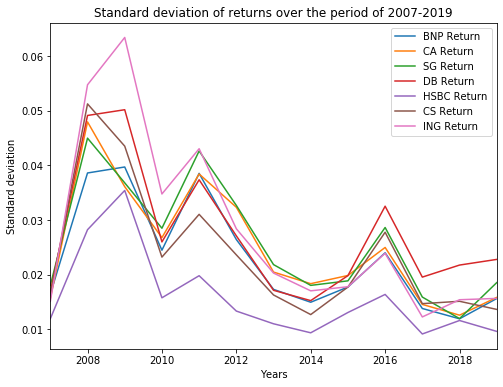

In [79]:
stdyeartranpose.index = stdyeartranpose.index.map(int) # let's change the index values of df_CI to type integer for plotting
stdyeartranpose.plot(kind='line',figsize=(8, 6))

plt.title('Standard deviation of returns over the period of 2007-2019')
plt.ylabel('Standard deviation')
plt.xlabel('Years')

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


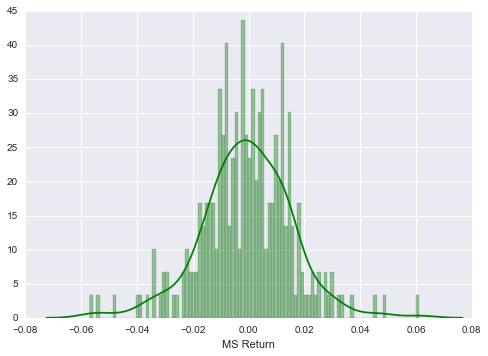

In [18]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


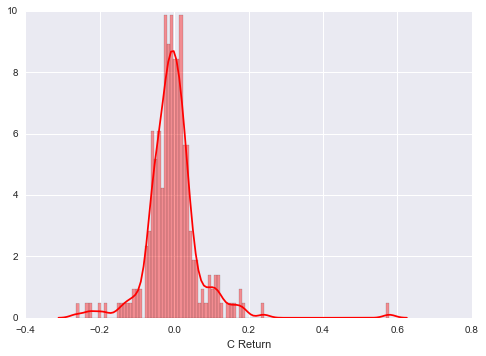

In [19]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

Text(0.5, 0, 'Years')

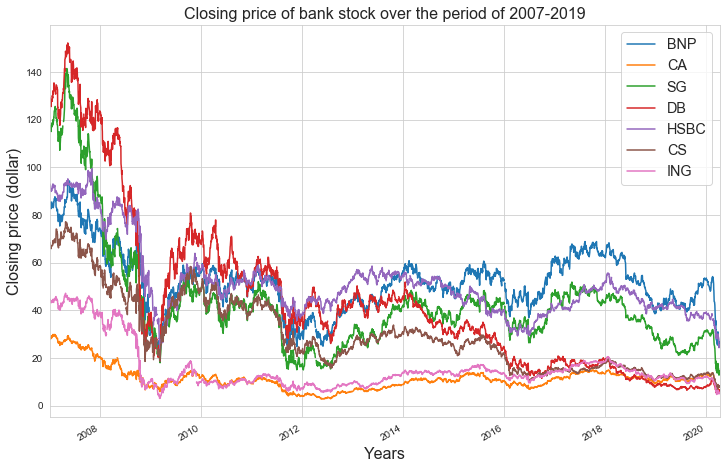

In [89]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,8),label=tick)
plt.legend(fontsize='x-large')
plt.title('Closing price of bank stock over the period of 2007-2019',size = 16)
plt.ylabel('Closing price (dollar)',size = 16)
plt.xlabel('Years',size = 16)

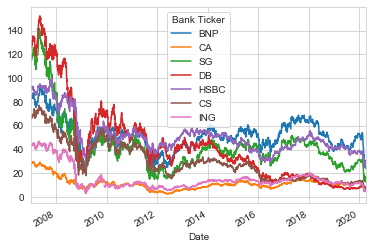

In [90]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

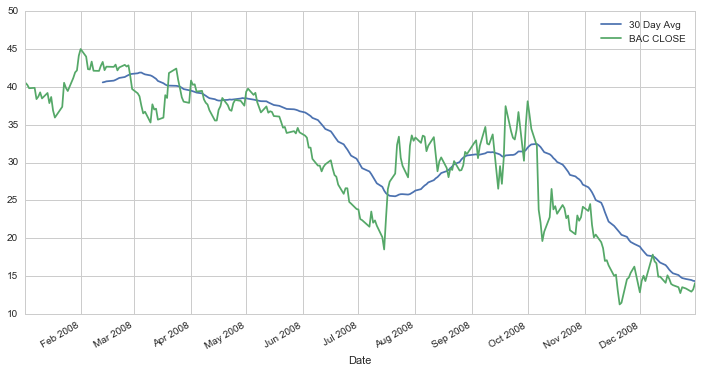

In [24]:
plt.figure(figsize=(12,6))
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

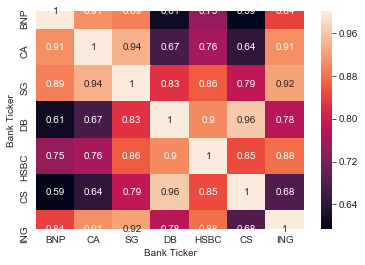

In [92]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

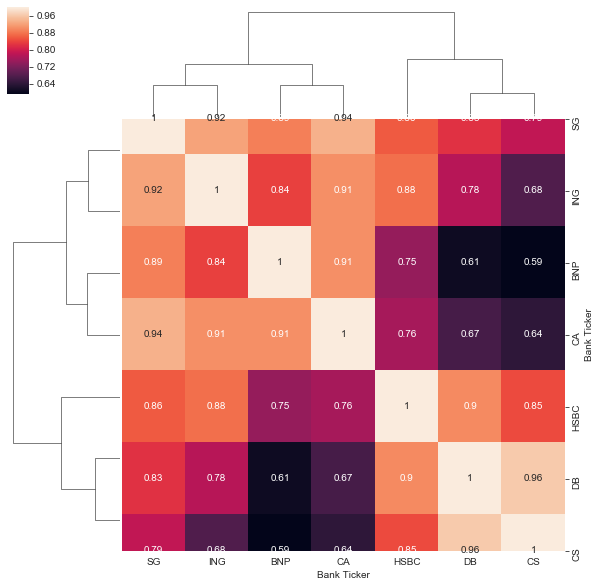

In [93]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [94]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [96]:
BNP[['Open', 'High', 'Low', 'Close']].ix['2015-01-01':'2016-01-01'].iplot(kind='candle')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [97]:
BNP['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [98]:
BNP['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.